# Setup

In [1]:
!python -m pip install gurobi-optimods
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.8/242.8 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 8.5 MB/s eta 0:00:00


# Importing libraries

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from gurobi_optimods.regression import LADRegression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Loading data

In [3]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Split data for fit assessment
xTrain, xTest, yTrain, yTest = train_test_split(
    diabetes["data"], diabetes["target"], random_state=42
)

# LAD Regression

In [4]:
lad = LADRegression()
lad.fit(xTrain, yTrain)
yPred = lad.predict(xTest)

print('##########################################')

mean_absolute_percentage_error(yPred, yTest)

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 331 rows, 673 columns and 4303 nonzeros
Model fingerprint: 0xb54fc171
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+01, 3e+02]
Presolve time: 0.01s
Presolved: 331 rows, 673 columns, 4303 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
     352    1.4473274e+04   0.000000e+00   0.000000e+00      0s

Solved in 352 iterations and 0.05 seconds (0.02 work units)
Optimal objective  1.447327363e+04
##########################################


0.30669892510816005

# Gradient Boost Regressor

In [5]:
model = CatBoostRegressor(iterations=2000,
                          learning_rate=1,
                          depth=5,
                          silent = True)
model.fit(xTrain, yTrain)
preds = model.predict(xTest)

mean_absolute_percentage_error(preds, yTest)

##########################################


0.4169949608948036

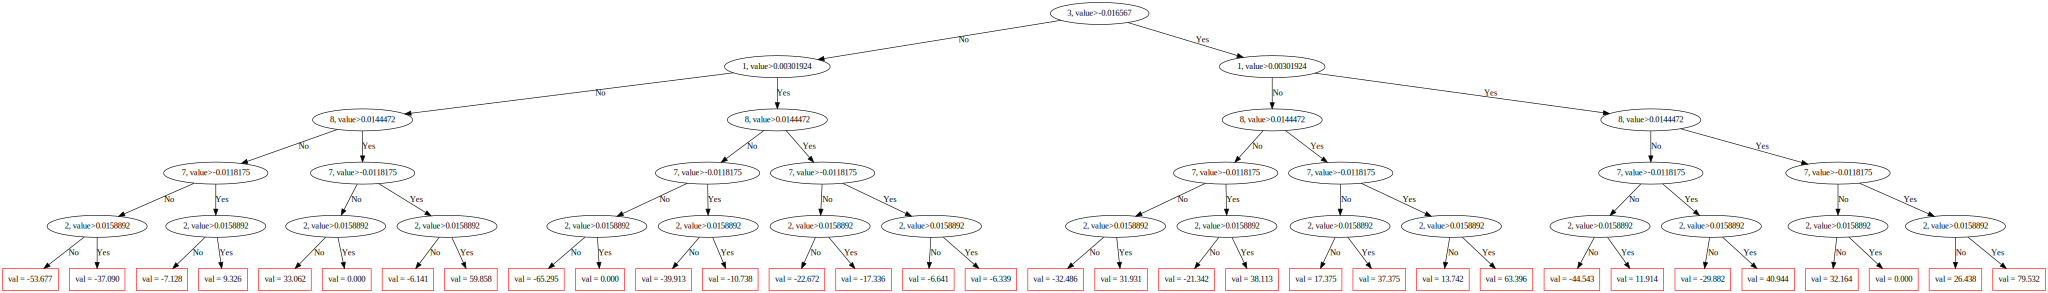

In [6]:
model.plot_tree(tree_idx=0)